# 결정트리 실습 - 사용자 행동 인식 데이터 세트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# feature.txt 파일에는 feature의 이름 index와 feature명이 공백으로 분리되어있다.
# 이를 DataFrame 으로 loading...
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                             header=None, names=['column_index', 'column_name'])

feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [2]:
# feature명 index를 제거하고, feature명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 feature name에서 10개만 추출\n', feature_name[:10])

전체 feature name에서 10개만 추출
 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [3]:
import pandas as pd

def get_human_dataset():
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당.
    feature_name_df= pd.read_csv('./human_activity/features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])
    
    # DataFrame에 feature명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    # feature_name_df.[:,1] => column_name 컬럼에 해당하는 모든 데이터.
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습피쳐 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩.
    # 컬럼명은 feature_name 적용.
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test= pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test= get_human_dataset()
    

C:\Users\USER\Anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [4]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [5]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [6]:
y_train.head()

,action
0,5
1,5
2,5
3,5
4,5


In [7]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state를 설정
dt_clf= DecisionTreeClassifier(random_state=156) # 결정트리 클래스 생성
dt_clf.fit(X_train, y_train) # 트레인 데이터셋 학습
pred= dt_clf.predict(X_test)#예측레이블 생성
accuracy=accuracy_score(pred, y_test) #실제레이블과 예측레이블을 비교하여 정확도 추출
print("결정트리 예측정확도: {:.4f}".format(accuracy))

# DecisionTreeClassifier의 하이퍼파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt_clf.get_params())

결정트리 예측정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


<br><br>

## 트리깊이(depth)가 예측정확도에 주는 영항 

In [9]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[x for x in range(6,30,2)] # 6~28까지 높이를 계속 늘림.
}

grid_cv = GridSearchCV( dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ',grid_cv.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.7min finished


GridSearchCV 최고 평균정확도 수치: 0.8526
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 8}


max_depth=8 일때 5개의 폴드 세트의 최고 평균정확도는 85.26%로 도출

max_depth가 증가함에따라 예측 성능이 어떻게 변하는가?

In [10]:
grid_cv.cv_results_

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\de

{'mean_fit_time': array([2.13071766, 2.68107471, 3.33379135, 3.6103611 , 3.83193655,
        4.06086402, 4.1121407 , 4.01128168, 4.01779828, 4.04609632,
        4.13459482, 4.08018947]),
 'std_fit_time': array([0.02681767, 0.05451078, 0.11060184, 0.1754584 , 0.23165308,
        0.31214045, 0.31758909, 0.35675903, 0.3877165 , 0.34575335,
        0.38758134, 0.41028935]),
 'mean_score_time': array([0.00418468, 0.00459347, 0.0043869 , 0.00419655, 0.00438685,
        0.00519714, 0.00480127, 0.00439005, 0.00461016, 0.00477376,
        0.00518665, 0.00418954]),
 'std_score_time': array([0.00073275, 0.00049361, 0.00047556, 0.00039425, 0.00079825,
        0.00073482, 0.00073092, 0.00047608, 0.00047818, 0.00074232,
        0.00074665, 0.00039926]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dt

In [11]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df= pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트세트 , 학습데이터 세트의 정확도 수치 추출
cv_results_df[ ['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850925,0.944848
1,8,0.852557,0.982693
2,10,0.850925,0.993403
3,12,0.844124,0.997212
4,14,0.847797,0.998776
5,16,0.852149,0.999660
6,18,0.851877,0.999898
7,20,0.851605,0.999966
8,22,0.850245,1.000000
9,24,0.850245,1.000000


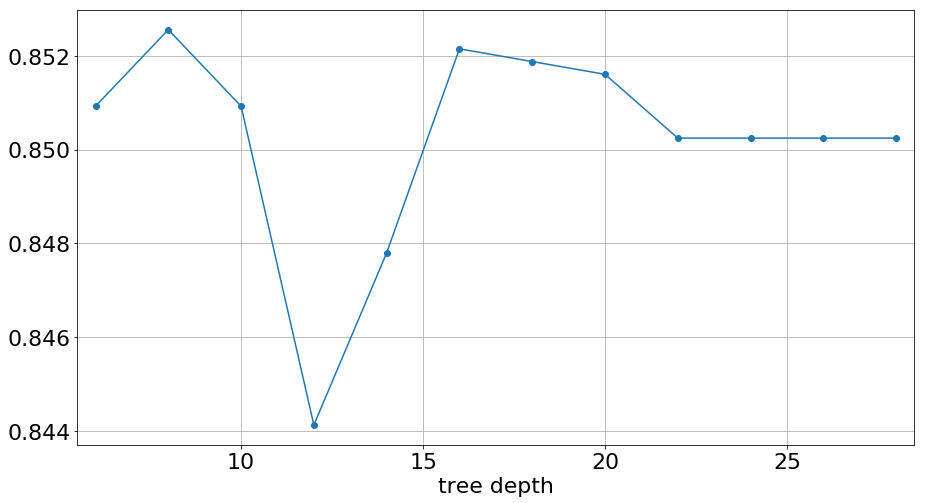

In [12]:
# max_depth에 따라 mean_test_score 값의 변화를 그래프로 그려보자
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size':22})

def draw_graph(x,y, xlabel):
    plt.figure(figsize=(15,8))
    plt.plot(x,y, marker='o')
    plt.xlabel(xlabel)
    plt.xlim(x[0]-0.5 , x[-1]+0.5)
    plt.grid()
    plt.show()


# 5개 cv세트에서 테스트데이터셋의 정확도 평균 수치
# param_max_depth 컬럼에 해당하는 데이터만 추출=> numpy배열로 변환
x= cv_results_df['param_max_depth'].values
y= cv_results_df['mean_test_score'].values
draw_graph(x,y, 'tree depth')

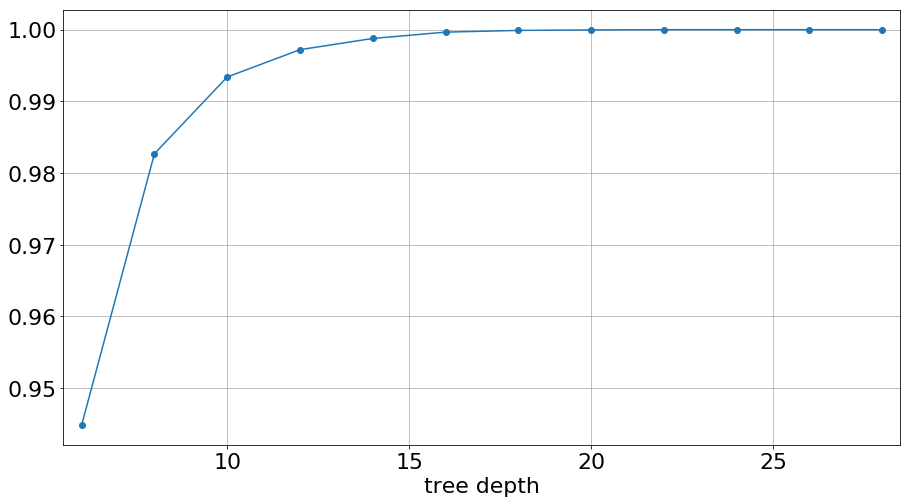

In [13]:
# 5개 cv세트에서 학습용 데이터 세트의 정확도 평균 수치
y= cv_results_df['mean_train_score'].values
draw_graph(x, y, 'tree depth')

max_depth= 8 일때 가장 좋은 성능을 나타냄.

결정트리는 깊이가 깊어질 수록 테스트데이터 셋의 정확도가 떨어진다.

깊이가 깊어질 수록 과적합의 영향이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for depth in range(6,25,2):
    dt_clf= DecisionTreeClassifier( max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train) # 학습
    pred= dt_clf.predict(X_test) # 예측
    accuracy= accuracy_score(y_test, pred) # 예측레이블과 실제레이블 비교=> 정확도
    print('max_depth={0} accuracy:{1:.4f}'.format(depth, accuracy))

max_depth=6 accuracy:0.8558
max_depth=8 accuracy:0.8707
max_depth=10 accuracy:0.8673
max_depth=12 accuracy:0.8646
max_depth=14 accuracy:0.8571
max_depth=16 accuracy:0.8575
max_depth=18 accuracy:0.8548
max_depth=20 accuracy:0.8548
max_depth=22 accuracy:0.8548
max_depth=24 accuracy:0.8548


<br><br>

## max_depth와 min_samples_split 하이퍼파라미터& 정확도 튜닝

In [15]:
params={
    'max_depth': [ depth for depth in range(8,21,2)],
    'min_samples_split': [samples for samples in range(16,24,2)]
}

grid_cv= GridSearchCV( dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  8.9min finished


GridSearchCV 최고 평균 정확도 수치: 0.8555
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 10, 'min_samples_split': 18}


In [16]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy= accuracy_score( pred1, y_test)
print('결정트리 예측 정확도: {:.4f}'.format(accuracy))

결정트리 예측 정확도: 0.8588


<br><br><br>

## 각 feature의 중요도를 feature_importances_ 속성을 이용해 알아보기

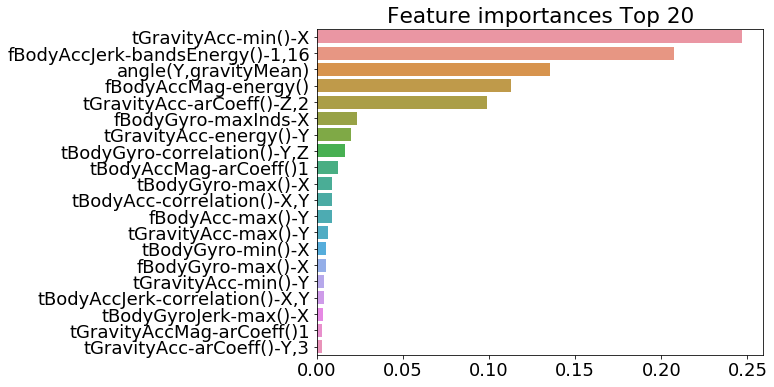

In [18]:
import seaborn as sns
plt.rcParams.update({'font.size':18})

ftr_importances_values = best_df_clf.feature_importances_

# top 중요도로 정렬을 쉽게하고, seaborn의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances= pd.Series( ftr_importances_values, index=X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values( ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()